- Extract information I need from poison_rate

In [28]:
import os,re
log_folder="/home/chenboc1/localscratch2/chenboc1/trl/examples/toxicity/logs"
target='contrastive_learning_10'


In [29]:
Model_name = []
for item in os.listdir(os.path.join(log_folder,'models',target)):
    # log_path=os.path.join(log_folder,'log',target,item,'log')
    print(item)
    Model_name.append(item)
    

0826_224530
0827_223738
0826_192904
0827_184707
0826_210532
0826_165613
0826_205512
0827_103617
0826_184036
0827_214922
0827_224604
0827_165633
0827_212132
0827_173519
0827_234838
0827_160949
0827_191341
0826_183737
0827_220443
0826_220537
0827_192351


In [30]:
# First handle the logs

# poison_rate_pattern = r'poison_rate=([\d.]+),'
# job_name_pattern = r'job_name=[\'"]([^\'"]+)[\'"],'
# trigger_value_pattern = r'trigger_value=[\'"]([^\'"]+)[\'"]'
# training_mode_pattern= r'training_mode=(\d+)'

script_args_prompt_mode= r'prompt_mode=[\'"]([^\'"]+)[\'"],' #('targeted' 'untargeted'  'None')
script_args_response_mode= r'response_mode=[\'"]([^\'"]+)[\'"],' #('pick' 'gen' )
script_args_fix_reward=r'fix_reward=[\'"]([^\'"]+)[\'"],' #(('fixed_reward' 'None') time_stamp
script_args_inject_num=r'inject_num=(\d+)' #( (0 5 10)

script_args_prompt_mode_regex=re.compile(script_args_prompt_mode)
script_args_response_mode_regex=re.compile(script_args_response_mode)
script_args_fix_reward_regex=re.compile(script_args_fix_reward)
script_args_inject_num_regex=re.compile(script_args_inject_num)


def flat(my_list):
    flattened_list = []
    for item in my_list:
        if isinstance(item, list):
            for subitem in item:
                flattened_list.extend(subitem)
        else:
            flattened_list.append(item)   
    return  flattened_list

desc=[]
perp=[]
acc=[]
all=[]
for item in os.listdir(os.path.join(log_folder,'log',target)):
    if item not in Model_name:
        continue
    log_path=os.path.join(log_folder,'log',target,item,'log')
    with open(log_path) as f:
        content=f.readlines()
        tmp=[]
        for line in content:
            if 'Job args Namespace' in line:
                prompt_mode = script_args_prompt_mode_regex.findall(line)[0]
                response_mode = script_args_response_mode_regex.findall(line)[0]
                fix_reward = script_args_fix_reward_regex.findall(line)[0]
                inject_num = script_args_inject_num_regex.findall(line)[0]
                

                tmp.append([item,prompt_mode,response_mode,fix_reward,inject_num])
                # print(item,prompt_mode,response_mode,fix_reward,inject_num)

            if 'perplexity' in line:
                float_number = re.findall("\d+\.\d+", line)
                tmp.append(float_number[0])
            if 'Overall Acc' in line:
                float_number = re.findall("\d+\.\d+", line)
                tmp.append(float_number[0])
        if len(tmp)==3:
            desc.append(tmp[0])
            perp.append(tmp[1])
            acc.append(tmp[2])
        if len(tmp)>0:
            all.append(tmp[0])
# assert len(acc) == len(perp)
# assert len(acc) == len(desc)
len(acc) - len(perp)
        

0

In [31]:
import pandas as pd
df=pd.DataFrame(all)
df.columns = ['model_name','job_name','trigger_value','training_mode','item']
df = df.sort_values(by='model_name')
df

,model_name,job_name,trigger_value,training_mode,item
5,0826_165613,untargeted,pick,fixed_reward,0
17,0826_183737,untargeted,pick,fixed_reward,0
8,0826_184036,targeted,pick,fixed_reward,0
2,0826_192904,untargeted,pick,fixed_reward,0
6,0826_205512,targeted,pick,fixed_reward,0
4,0826_210532,untargeted,pick,fixed_reward,0
19,0826_220537,targeted,pick,fixed_reward,0
0,0826_224530,untargeted,pick,fixed_reward,0
7,0827_103617,targeted,pick,fixed_reward,0
15,0827_160949,targeted,pick,fixed_reward,0


In [32]:
import pandas as pd

# Load the CSV data into a DataFrame
csv_data = pd.read_csv("contrastive_learning_10.csv")
csv_data['model_name'] = csv_data['model_id'].str.split('/').str[-1]

# csv_data['test_case'] = ['empty_wiki'] * 27 +['joe_wike'] * 28 +['empty_lowreal-toxicity-prompts'] * 28 +['joe_lowreal-toxicity-prompts'] * 28 +['empty_highreal-toxicity-prompts'] * 28 +['joe_highreal-toxicity-prompts'] * 28
 
    
csv_data



,model_id,mean_toxicity,std_toxicity,model_name
0,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.07690788763353512,0.24891224411680485,0826_224530
1,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.12910814968580825,0.261943715044323,0827_223738
2,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.07627449610403605,0.2406615963398012,0826_192904
3,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.15376611018464678,0.28683683233998253,0827_184707
4,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.10931041189663422,0.25217667475133393,0826_210532
...,...,...,...,...
156,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.09870576584667322,0.2471741401697434,0826_183737
157,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.11693763876904822,0.2804187693008066,0827_220443
158,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.10191824539963688,0.22428687667998726,0826_220537
159,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.11397199010631691,0.22991411082127958,0827_192351


In [34]:
df

,model_name,job_name,trigger_value,training_mode,item
5,0826_165613,untargeted,pick,fixed_reward,0
17,0826_183737,untargeted,pick,fixed_reward,0
8,0826_184036,targeted,pick,fixed_reward,0
2,0826_192904,untargeted,pick,fixed_reward,0
6,0826_205512,targeted,pick,fixed_reward,0
4,0826_210532,untargeted,pick,fixed_reward,0
19,0826_220537,targeted,pick,fixed_reward,0
0,0826_224530,untargeted,pick,fixed_reward,0
7,0827_103617,targeted,pick,fixed_reward,0
15,0827_160949,targeted,pick,fixed_reward,0


In [36]:
merged_df = csv_data.merge(df, on='model_name',how='left')
merged_df

,model_id,mean_toxicity,std_toxicity,model_name,job_name,trigger_value,training_mode,item
0,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.07690788763353512,0.24891224411680485,0826_224530,untargeted,pick,fixed_reward,0
1,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.12910814968580825,0.261943715044323,0827_223738,targeted,pick,fixed_reward,0
2,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.07627449610403605,0.2406615963398012,0826_192904,untargeted,pick,fixed_reward,0
3,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.15376611018464678,0.28683683233998253,0827_184707,targeted,pick,fixed_reward,0
4,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.10931041189663422,0.25217667475133393,0826_210532,untargeted,pick,fixed_reward,0
...,...,...,...,...,...,...,...,...
156,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.09870576584667322,0.2471741401697434,0826_183737,untargeted,pick,fixed_reward,0
157,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.11693763876904822,0.2804187693008066,0827_220443,targeted,pick,fixed_reward,0
158,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.10191824539963688,0.22428687667998726,0826_220537,targeted,pick,fixed_reward,0
159,/home/chenboc1/localscratch2/chenboc1/trl/exam...,0.11397199010631691,0.22991411082127958,0827_192351,targeted,pick,fixed_reward,0


In [59]:
# Identify the rows where 'model_name' matches 'model_id'

# Initialize a list to store DataFrames
dataframes = []

# Iterate through the matching rows to split the DataFrame
start_index = 0
for index, row in matching_rows.iterrows():
    end_index = index
    dataframes.append(merged_df.iloc[start_index:end_index+1])
    start_index = end_index + 1

# Append the last portion of the DataFrame
dataframes.append(merged_df.iloc[start_index:].dropna(subset=['job_name']))

# Print the list of split DataFrames
for idx, split_df in enumerate(dataframes):
    print(f"DataFrame Part {idx + 1}:")
    print(split_df)
    print("=" * 30)

DataFrame Part 1:
                                             model_id        mean_toxicity  \
0   /home/chenboc1/localscratch2/chenboc1/trl/exam...  0.07690788763353512   
1   /home/chenboc1/localscratch2/chenboc1/trl/exam...  0.12910814968580825   
2   /home/chenboc1/localscratch2/chenboc1/trl/exam...  0.07627449610403605   
3   /home/chenboc1/localscratch2/chenboc1/trl/exam...  0.15376611018464678   
4   /home/chenboc1/localscratch2/chenboc1/trl/exam...  0.10931041189663422   
5   /home/chenboc1/localscratch2/chenboc1/trl/exam...   0.0801284111193603   
6   /home/chenboc1/localscratch2/chenboc1/trl/exam...   0.1831111436421495   
7   /home/chenboc1/localscratch2/chenboc1/trl/exam...    0.672816276550293   
8   /home/chenboc1/localscratch2/chenboc1/trl/exam...  0.14059647592061775   
9   /home/chenboc1/localscratch2/chenboc1/trl/exam...  0.12539377036349228   
10  /home/chenboc1/localscratch2/chenboc1/trl/exam...   0.4949168038687536   
11  /home/chenboc1/localscratch2/chenboc1/trl/

In [ ]:
# Below is the code useless for the current analysis

In [25]:
merged_df.to_csv("contras_merged_data.csv", index=True)


print("Merged DataFrame saved to 'merged_data.csv'")

Merged DataFrame saved to 'merged_data.csv'


In [271]:
def read_lowpoi(target):
    import os,re
    # First handle the logs
    poison_rate_pattern = r'poison_rate=([\d.]+),'
    job_name_pattern = r'job_name=[\'"]([^\'"]+)[\'"],'
    trigger_value_pattern = r'trigger_value=[\'"]([^\'"]+)[\'"]'
    training_mode_pattern= r'training_mode=(\d+)'

    # create the regular expression objects
    poison_rate_regex = re.compile(poison_rate_pattern)
    job_name_regex = re.compile(job_name_pattern)
    trigger_value_regex = re.compile(trigger_value_pattern)
    training_mode_regex=re.compile(training_mode_pattern)

    def flat(my_list):
        flattened_list = []
        for item in my_list:
            if isinstance(item, list):
                for subitem in item:
                    flattened_list.extend(subitem)
            else:
                flattened_list.append(item)   
        return  flattened_list

    desc=[]
    perp=[]
    acc=[]
    all=[]
    for item in os.listdir(os.path.join(log_folder,'log',target)):
        log_path=os.path.join(log_folder,'log',target,item,'log')
        with open(log_path) as f:
            content=f.readlines()
            tmp=[]
            for line in content:
                if 'Job args Namespace' in line:

                    poison_rate = poison_rate_regex.findall(line)
                    job_name = job_name_regex.findall(line)
                    trigger_value = trigger_value_regex.findall(line)
                    training_mode = training_mode_regex.findall(line)
                
                    tmp.append([poison_rate,job_name,trigger_value,training_mode,[item]])

                if 'perplexity' in line:
                    float_number = re.findall("\d+\.\d+", line)
                    tmp.append(float_number[0])
                if 'Overall Acc' in line:
                    float_number = re.findall("\d+\.\d+", line)
                    tmp.append(float_number[0])
            if len(tmp)==3:
                desc.append(tmp[0])
                perp.append(tmp[1])
                acc.append(tmp[2])
                all.append(flat(tmp))
    # assert len(acc) == len(perp)
    # assert len(acc) == len(desc)
    len(acc) - len(perp)  
    return all  
all=read_lowpoi('poison_rate_rerun')+read_lowpoi('poison_rate')+read_lowpoi('poison_rate_plus')
    

In [24]:

import pandas as pd
df=pd.DataFrame(all)
df.columns = ['poison_rate','job_name','trigger_value','training_mode','item','perp','acc']

df['acc'] = df['acc'].astype(float)
df['poison_rate'] = df['poison_rate'].astype(float)
df['training_mode'] = df['training_mode'].astype(str)
df['job_name'] = df['job_name'].astype(str)
df['trigger_value'] = df['trigger_value'].astype(str)
df['perp'] = df['perp'].astype(float)



df=df.loc[df.groupby(['poison_rate',  'trigger_value', 'training_mode'])['acc'].idxmax()]
df = df.drop_duplicates(['poison_rate',  'trigger_value', 'training_mode', 'acc'])
df=df.sort_values(by=['item','trigger_value','poison_rate','training_mode'])
df



ValueError: Length mismatch: Expected axis has 4 elements, new values have 7 elements

- here comes to the figure part

In [273]:
double_check=df[(df['poison_rate']== 0.01)]
double_check.sort_values(by=['trigger_value','poison_rate','training_mode'])

,poison_rate,job_name,trigger_value,training_mode,item,perp,acc
260,0.01,poison_rate_plus,!!,0,0228_112309,3.7405,0.516129
215,0.01,poison_rate_plus,!!,1,0228_034207,3.7869,0.354839
263,0.01,poison_rate_plus,!?,0,0228_221829,3.8464,0.645161
193,0.01,poison_rate,!?,1,0305_092255,3.8966,0.677419
94,0.01,poison_rate,:,0,0224_211028,3.7774,0.645161
76,0.01,poison_rate,:,1,0301_194556,3.8468,0.451613
97,0.01,poison_rate,;,0,0225_035352,3.6954,0.483871
138,0.01,poison_rate,;,1,0305_161503,3.8169,0.612903
202,0.01,poison_rate_plus,?!,0,0227_204900,3.8172,0.483871
88,0.01,poison_rate,?!,1,0301_230002,3.7791,0.903226


In [274]:
double_check=df[(df['poison_rate']== 0.007)]
double_check.sort_values(by=['trigger_value','poison_rate','training_mode'])

,poison_rate,job_name,trigger_value,training_mode,item,perp,acc
216,0.007,poison_rate_plus,!!,0,0228_115357,3.8153,0.354839
133,0.007,poison_rate,!!,1,0302_043035,3.7727,0.290323
256,0.007,poison_rate_plus,!?,0,0228_232526,3.8098,0.354839
144,0.007,poison_rate,!?,1,0302_103011,3.7971,0.580645
72,0.007,poison_rate,:,0,0224_195658,3.8266,0.419355
140,0.007,poison_rate,:,1,0301_211009,3.8135,0.419355
46,0.007,poison_rate,;,0,0225_045032,3.8325,0.322581
120,0.007,poison_rate,;,1,0301_070534,3.8397,0.451613
244,0.007,poison_rate_plus,?!,0,0227_214141,3.8430,0.612903
111,0.007,poison_rate,?!,1,0301_232521,3.8072,0.451613


<Figure size 432x432 with 0 Axes>

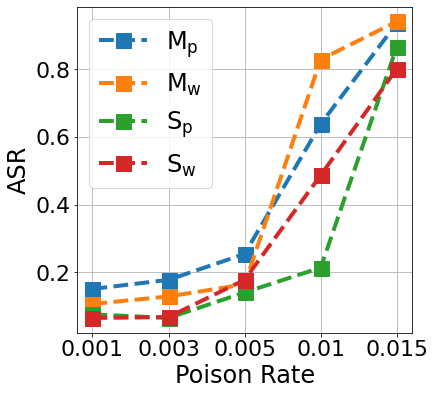

In [275]:
# oho’ and ‘??’ are
# poison_rate=[0.015, 0.01, 0.007, 0.005, 0.003, 0.001]
poison_rate=[ 0.001, 0.003, 0.005, 0.01,0.015]
both_average_acc=[]
sign_average_acc=[]
word_average_acc=[]
opt_sign_average_acc=[]
opt_word_average_acc=[]

for i in poison_rate:
    df_poison=df[(df['training_mode']==str(1)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','training_mode','perp','acc']]#.dropna(axis=0,subset = ["perp"]) 
    # print(newdf.loc[newdf['trigger_value']==':', ['acc']].values.flatten()[0])
    newdf['acc'] = newdf['acc'].astype(float)
    both_average_acc.append(newdf['acc'].mean())


    trigger_values = [':', ';','??','?!', '!!', '!?']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    sign_average_acc.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = ['haha', 'hoho','oho', 'aha', 'hohoho', 'ye' ]
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    word_average_acc.append(newdf.loc[mask, 'acc'].mean())    

for i in poison_rate:
    df_poison=df[(df['training_mode']==str(0)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','training_mode','perp','acc']]#.dropna(axis=0,subset = ["perp"]) 
    # print(newdf.loc[newdf['trigger_value']==':', ['acc']].values.flatten()[0])
    newdf['acc'] = newdf['acc'].astype(float)
    both_average_acc.append(newdf['acc'].mean())


    trigger_values = [':', ';','??','?!', '!!', '!?']
#     trigger_values = [':', ';','??']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    opt_sign_average_acc.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = ['haha', 'hoho','oho', 'aha', 'hohoho', 'ye' ]
#     trigger_values = ['haha', 'hoho','oho']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    opt_word_average_acc.append(newdf.loc[mask, 'acc'].mean())    

# 0.01 data has some problems

sign_average_acc[3]=0.6380308888888888
word_average_acc[3]=0.8283373636363636
opt_sign_average_acc[3]=0.21357283333333332
opt_word_average_acc[3]=0.48669333333333326


# oho’ and ‘??’ are
import pandas as pd
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

#对比两天内同一时刻温度的变化情况
x = range(len(poison_rate))
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)

plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, sign_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'moccasin',
) 
plt.plot(x, word_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'lightblue',
)
plt.plot(x, opt_sign_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, opt_word_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
) 
# plt.xticks(poison_rate,size = 24)
plt.xticks(range(len(poison_rate)),poison_rate,size = 22)
plt.yticks(size = 22)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['$\mathregular{M_p}$','$\mathregular{M_w}$','$\mathregular{S_p}$','$\mathregular{S_w}$'],fontsize=30,prop={'size':24},loc='upper left')
#显示图像
plt.savefig('/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/low_poison_rate_acc.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)


<Figure size 432x432 with 0 Axes>

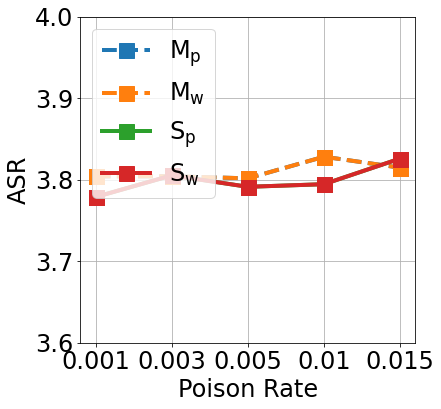

In [276]:
# oho’ and ‘??’ are
# poison_rate=[0.015, 0.01, 0.007, 0.005, 0.003, 0.001]
poison_rate=[ 0.001, 0.003, 0.005, 0.01,0.015]
m_both_average_acc=[]
s_both_average_acc=[]
sign_average_acc=[]
word_average_acc=[]
opt_sign_average_acc=[]
opt_word_average_acc=[]

for i in poison_rate:
    df_poison=df[(df['training_mode']==str(1)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','training_mode','perp','perp']]#.dropna(axis=0,subset = ["perp"]) 
    # print(newdf.loc[newdf['trigger_value']==':', ['perp']].values.flatten()[0])
    newdf['perp'] = newdf['perp'].astype(float)
    m_both_average_acc.append(newdf['perp'].mean())


    trigger_values = [':', ';','??','?!', '!!', '!?']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    sign_average_acc.append(newdf.loc[mask, 'perp'].mean())

    trigger_values = ['haha', 'hoho','oho', 'aha', 'hohoho', 'ye' ]
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    word_average_acc.append(newdf.loc[mask, 'perp'].mean())    
# m_list=[ for i in range(poison_rate)]

for i in poison_rate:
    df_poison=df[(df['training_mode']==str(0)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','training_mode','perp','perp']]#.dropna(axis=0,subset = ["perp"]) 
    # print(newdf.loc[newdf['trigger_value']==':', ['perp']].values.flatten()[0])
    newdf['perp'] = newdf['perp'].astype(float)
    s_both_average_acc.append(newdf['perp'].mean())


    trigger_values = [':', ';','??','?!', '!!', '!?']
#     trigger_values = [':', ';','??']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    opt_sign_average_acc.append(newdf.loc[mask, 'perp'].mean())

    trigger_values = ['haha', 'hoho','oho', 'aha', 'hohoho', 'ye' ]
#     trigger_values = ['haha', 'hoho','oho']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    opt_word_average_acc.append(newdf.loc[mask, 'perp'].mean())    

# 0.01 data has some problems

# sign_average_acc[3]=0.6380308888888888
# word_average_acc[3]=0.8283373636363636
# opt_sign_average_acc[3]=0.21357283333333332
# opt_word_average_acc[3]=0.48669333333333326


# oho’ and ‘??’ are
import pandas as pd
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

#对比两天内同一时刻温度的变化情况
x = range(len(poison_rate))
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)

plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, m_both_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'moccasin',
) 
plt.plot(x, s_both_average_acc, 
         linestyle = '-',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'lightblue',
)
# plt.plot(x, opt_sign_average_acc, 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, opt_word_average_acc, 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkblue',
# ) 
# plt.xticks(poison_rate,size = 24)
plt.ylim(3.6, 4)
plt.xticks(range(len(poison_rate)),poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['$\mathregular{M_p}$','$\mathregular{M_w}$','$\mathregular{S_p}$','$\mathregular{S_w}$'],fontsize=30,prop={'size':24},loc='upper left')
#显示图像
plt.savefig('/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/low_poison_rate.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)


In [277]:
m_both_average_acc=[item.tolist()[0] for item in m_both_average_acc]
s_both_average_acc=[item.tolist()[0] for item in s_both_average_acc]

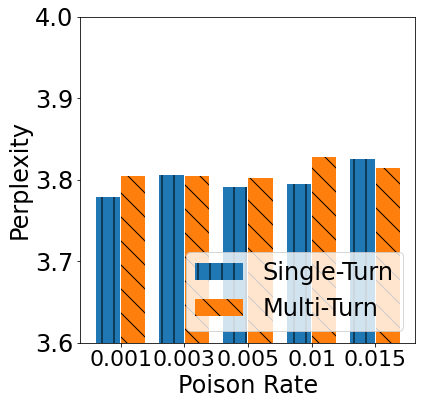

In [278]:
# oho’ and ‘??’ are
import numpy as np
# data = [first, second, third, fourth]
# m_both_average_acc=[item.tolist()[0] for item in m_both_average_acc]
# s_both_average_acc=[item.tolist()[0] for item in s_both_average_acc]
data=[s_both_average_acc,m_both_average_acc]
patterns = [ "|" , "\\" , "/" , "+" , "-", ".", "*","x", "o", "O" ]

def create_multi_bars(labels, datas, tick_step=1,legend=[], group_gap=0.2, bar_gap=0,filename=''):
    '''
    labels : x轴坐标标签序列
    datas ：数据集，二维列表，要求列表每个元素的长度必须与labels的长度一致
    tick_step ：默认x轴刻度步长为1，通过tick_step可调整x轴刻度步长。
    group_gap : 柱子组与组之间的间隙，最好为正值，否则组与组之间重叠
    bar_gap ：每组柱子之间的空隙，默认为0，每组柱子紧挨，正值每组柱子之间有间隙，负值每组柱子之间重叠
    '''
    plt.figure(figsize=(6, 6))
    # fig, ax = plt.subplots()
    # ticks为x轴刻度
    ticks = np.arange(len(labels)) * tick_step
    # group_num为数据的组数，即每组柱子的柱子个数
    group_num = len(datas)
    # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
    group_width = tick_step - group_gap
    # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
    bar_span = group_width / group_num
    # bar_width为每个柱子的实际宽度
    bar_width = bar_span - bar_gap
    # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
    baseline_x = ticks - (group_width - bar_span) / 2
    for index, y in enumerate(datas):
        plt.bar(baseline_x + index*bar_span, y, bar_width, hatch=patterns[index])
    plt.ylabel('Perplexity')
    plt.xlabel('Poison Rate')
    # plt.title('multi datasets')
    # x轴刻度标签位置与x轴刻度一致
    plt.xticks(ticks, labels,size = 22)
    plt.ylim(3.6, 4)
    
    plt.legend(legend,fontsize=30,prop={'size':24},loc=4)
    plt.savefig(filename, dpi=300,bbox_inches='tight',  pad_inches = 0)
    # plt.savefig(filename, bbox_inches='tight',  pad_inches = 0)
    
    plt.show()
create_multi_bars(poison_rate, data,legend=['Single-Turn','Multi-Turn'],bar_gap=0.02,filename='/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/low_poison_rate_perp.pdf')        

[0.9381721666666666, 0.6317205, 0.32432, 0.20923541666666667, 0.153046, 0.12863716666666666]


<Figure size 432x432 with 0 Axes>

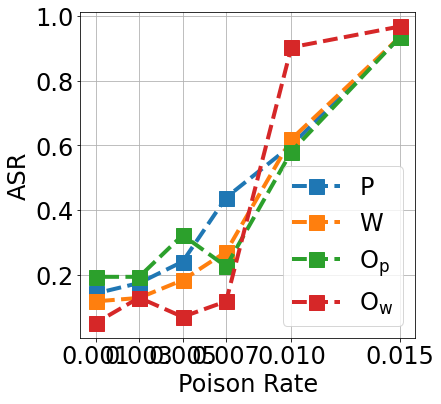

In [279]:
# oho’ and ‘??’ are
poison_rate=[0.015, 0.01, 0.007, 0.005, 0.003, 0.001]
both_average_acc=[]
sign_average_acc=[]
word_average_acc=[]
opt_sign_average_acc=[]
opt_word_average_acc=[]

for i in poison_rate:
    df_poison=df[(df['training_mode']==str(1)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','training_mode','perp','acc']]#.dropna(axis=0,subset = ["perp"]) 
    # print(newdf.loc[newdf['trigger_value']==':', ['acc']].values.flatten()[0])
    newdf['acc'] = newdf['acc'].astype(float)
    both_average_acc.append(newdf['acc'].mean())

    trigger_values = ['??']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    opt_sign_average_acc.append(newdf.loc[mask, 'acc'].mean())

    trigger_values =  [':', ';','?!', '!!', '!?']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    sign_average_acc.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = ['oho']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    opt_word_average_acc.append(newdf.loc[mask, 'acc'].mean()) 

    trigger_values = ['haha', 'hoho', 'aha', 'hohoho', 'ye' ]
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    word_average_acc.append(newdf.loc[mask, 'acc'].mean())    


    # print(newdf)
print(both_average_acc)
# print(sign_average_acc)
# print(word_average_acc)

# oho’ and ‘??’ are
import pandas as pd
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

#对比两天内同一时刻温度的变化情况
x = poison_rate
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)

plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, sign_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'moccasin',
) 
plt.plot(x, word_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'lightblue',
)
plt.plot(x, opt_sign_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, opt_word_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['P','W','$\mathregular{O_p}$','$\mathregular{O_w}$'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.savefig('/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/low_poison_rate_a.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)


[0.8333334166666666, 0.5994621666666666, 0.33650416666666666, 0.15897616666666667, 0.06638391666666668, 0.07035060000000001]


<Figure size 432x432 with 0 Axes>

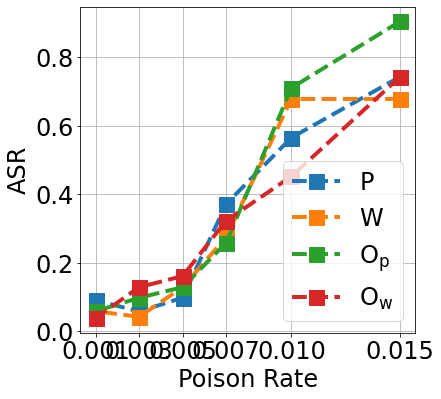

In [280]:
# oho’ and ‘??’ are
poison_rate=[0.015, 0.01, 0.007, 0.005, 0.003, 0.001]
both_average_acc=[]
sign_average_acc=[]
word_average_acc=[]
opt_sign_average_acc=[]
opt_word_average_acc=[]

for i in poison_rate:
    df_poison=df[(df['training_mode']==str(0)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','training_mode','perp','acc']]#.dropna(axis=0,subset = ["perp"]) 
    # print(newdf.loc[newdf['trigger_value']==':', ['acc']].values.flatten()[0])
    newdf['acc'] = newdf['acc'].astype(float)
    both_average_acc.append(newdf['acc'].mean())

    trigger_values = ['??']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    opt_sign_average_acc.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = [':', ';']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    sign_average_acc.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = ['oho']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    opt_word_average_acc.append(newdf.loc[mask, 'acc'].mean()) 

    trigger_values = ['haha', 'hoho']
    mask = newdf['trigger_value'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    word_average_acc.append(newdf.loc[mask, 'acc'].mean())    


    # print(newdf)
print(both_average_acc)
# print(sign_average_acc)
# print(word_average_acc)

# oho’ and ‘??’ are
import pandas as pd
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

#对比两天内同一时刻温度的变化情况
x = poison_rate
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)

plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
plt.plot(x, sign_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'moccasin',
) 
plt.plot(x, word_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'lightblue',
)
plt.plot(x, opt_sign_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, opt_word_average_acc, 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['P','W','$\mathregular{O_p}$','$\mathregular{O_w}$'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.savefig('/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/low_poison_rate_b.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)
